# Titanic machine learning classification:  CRISP-DM approach

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from scipy.stats import zscore

# Some warnings can be ignored in the produced notebook.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1.1  Structure of dataset

Loading Titanic dataset file and then showing few lines data and information of column types.

In [16]:
# Load the data
df = pd.read_csv('./data/titanic.csv')

# Example of data rows
print("First three rows of the dataframe:")
print(df.head(3))
print("\nLast three rows of the dataframe:")
print(df.tail(3))

# Display the shape of the DataFrame
print("\nShape of the dataframe:")
print(df.shape)

First three rows of the dataframe:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  

Last three rows of the dataframe:
     PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891        

### 1.2 Summary statistics
Showing basic summary and information of the Dataset.

In [17]:
# Summary statistics
print("Summary statistics for numerical columns:")
print(df.describe().round(3))

# Information about the DataFrame
print("\nInformation about the dataframe:")
print(df.info())

Summary statistics for numerical columns:
       PassengerId  Survived   Pclass      Age    SibSp    Parch     Fare
count      891.000   891.000  891.000  714.000  891.000  891.000  891.000
mean       446.000     0.384    2.309   29.699    0.523    0.382   32.204
std        257.354     0.487    0.836   14.526    1.103    0.806   49.693
min          1.000     0.000    1.000    0.420    0.000    0.000    0.000
25%        223.500     0.000    2.000   20.125    0.000    0.000    7.910
50%        446.000     0.000    3.000   28.000    0.000    0.000   14.454
75%        668.500     1.000    3.000   38.000    1.000    0.000   31.000
max        891.000     1.000    3.000   80.000    8.000    6.000  512.329

Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-n

### 1.3 Missing values
Searching for Missing values or NaN values in the Dataset.


In [18]:
# Number of missing values in each column
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## 2. Visualization
Visualizing the raw data: survivors, passenger ages, survival rate and anything other descriptive features of the dataset.

* the count of survivors.
* the distribution of passenger ages.
* the survival rate by passenger class.
* the survival rate by gender.
* the survival rate by passenger class and gender.


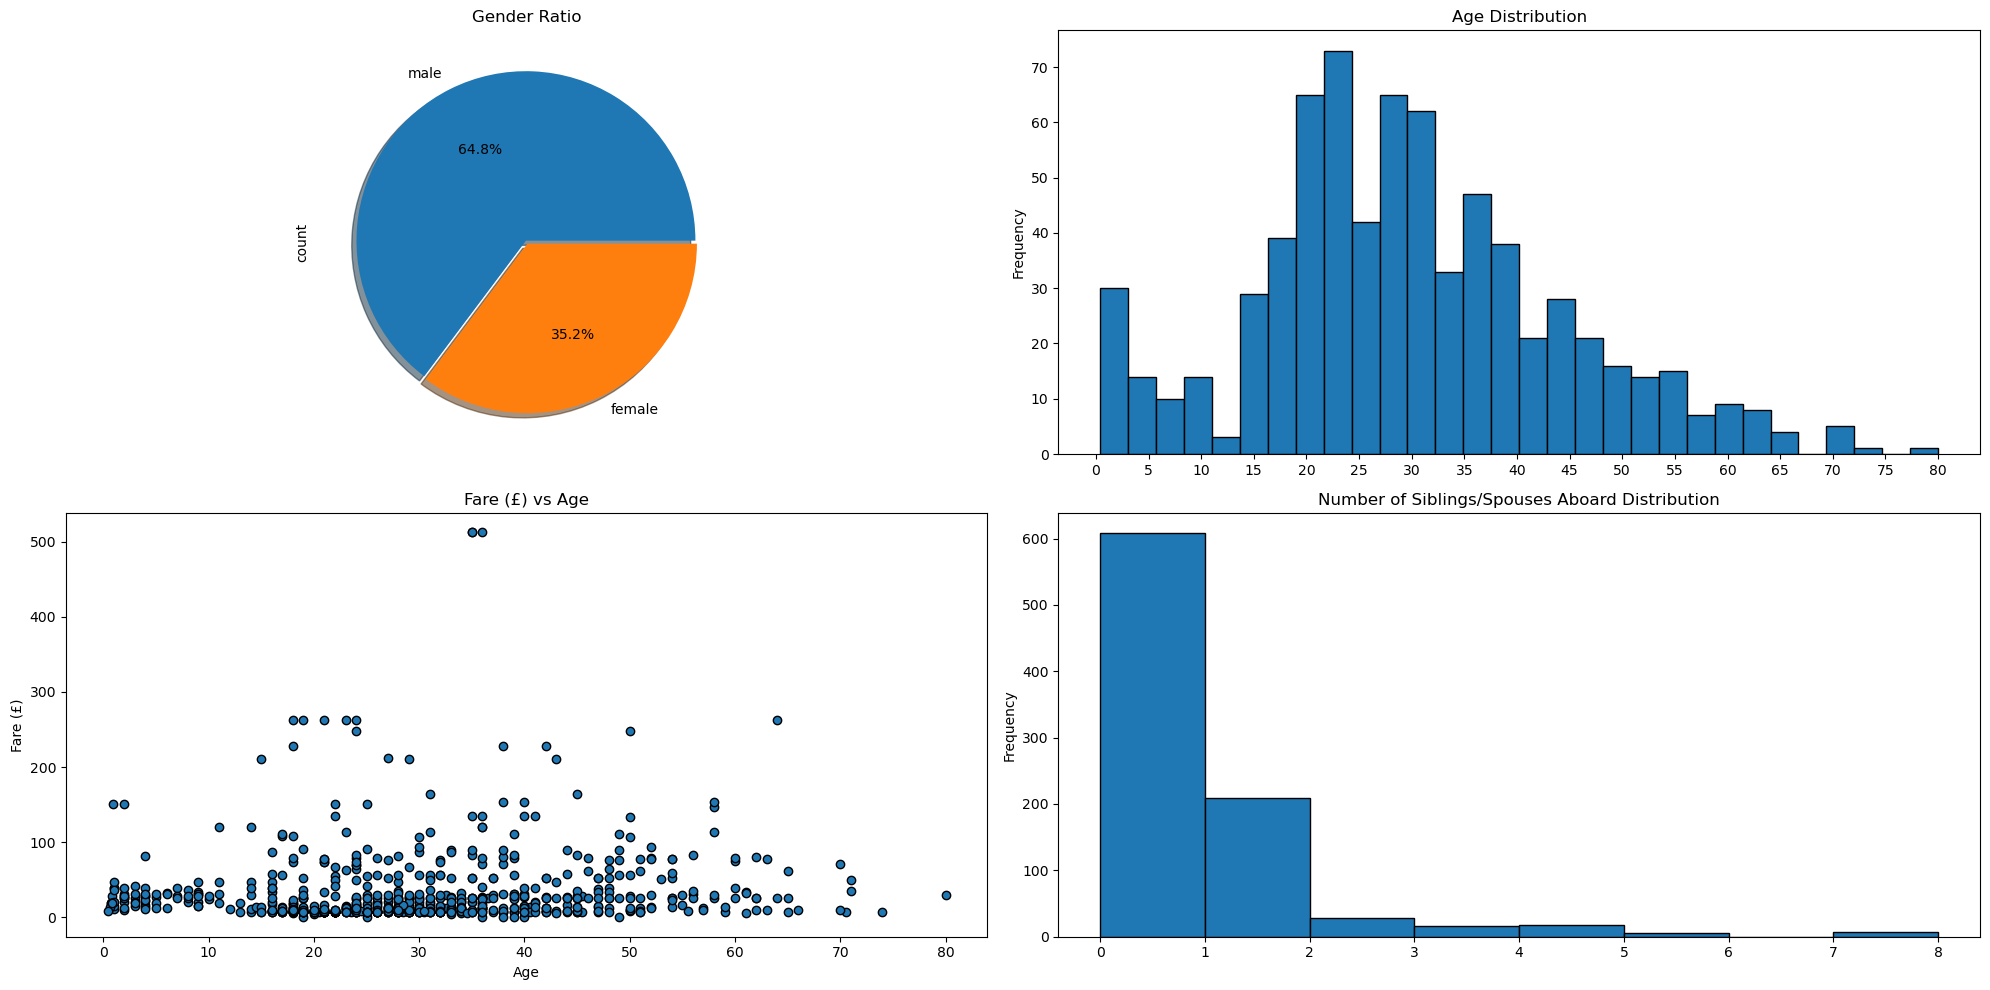

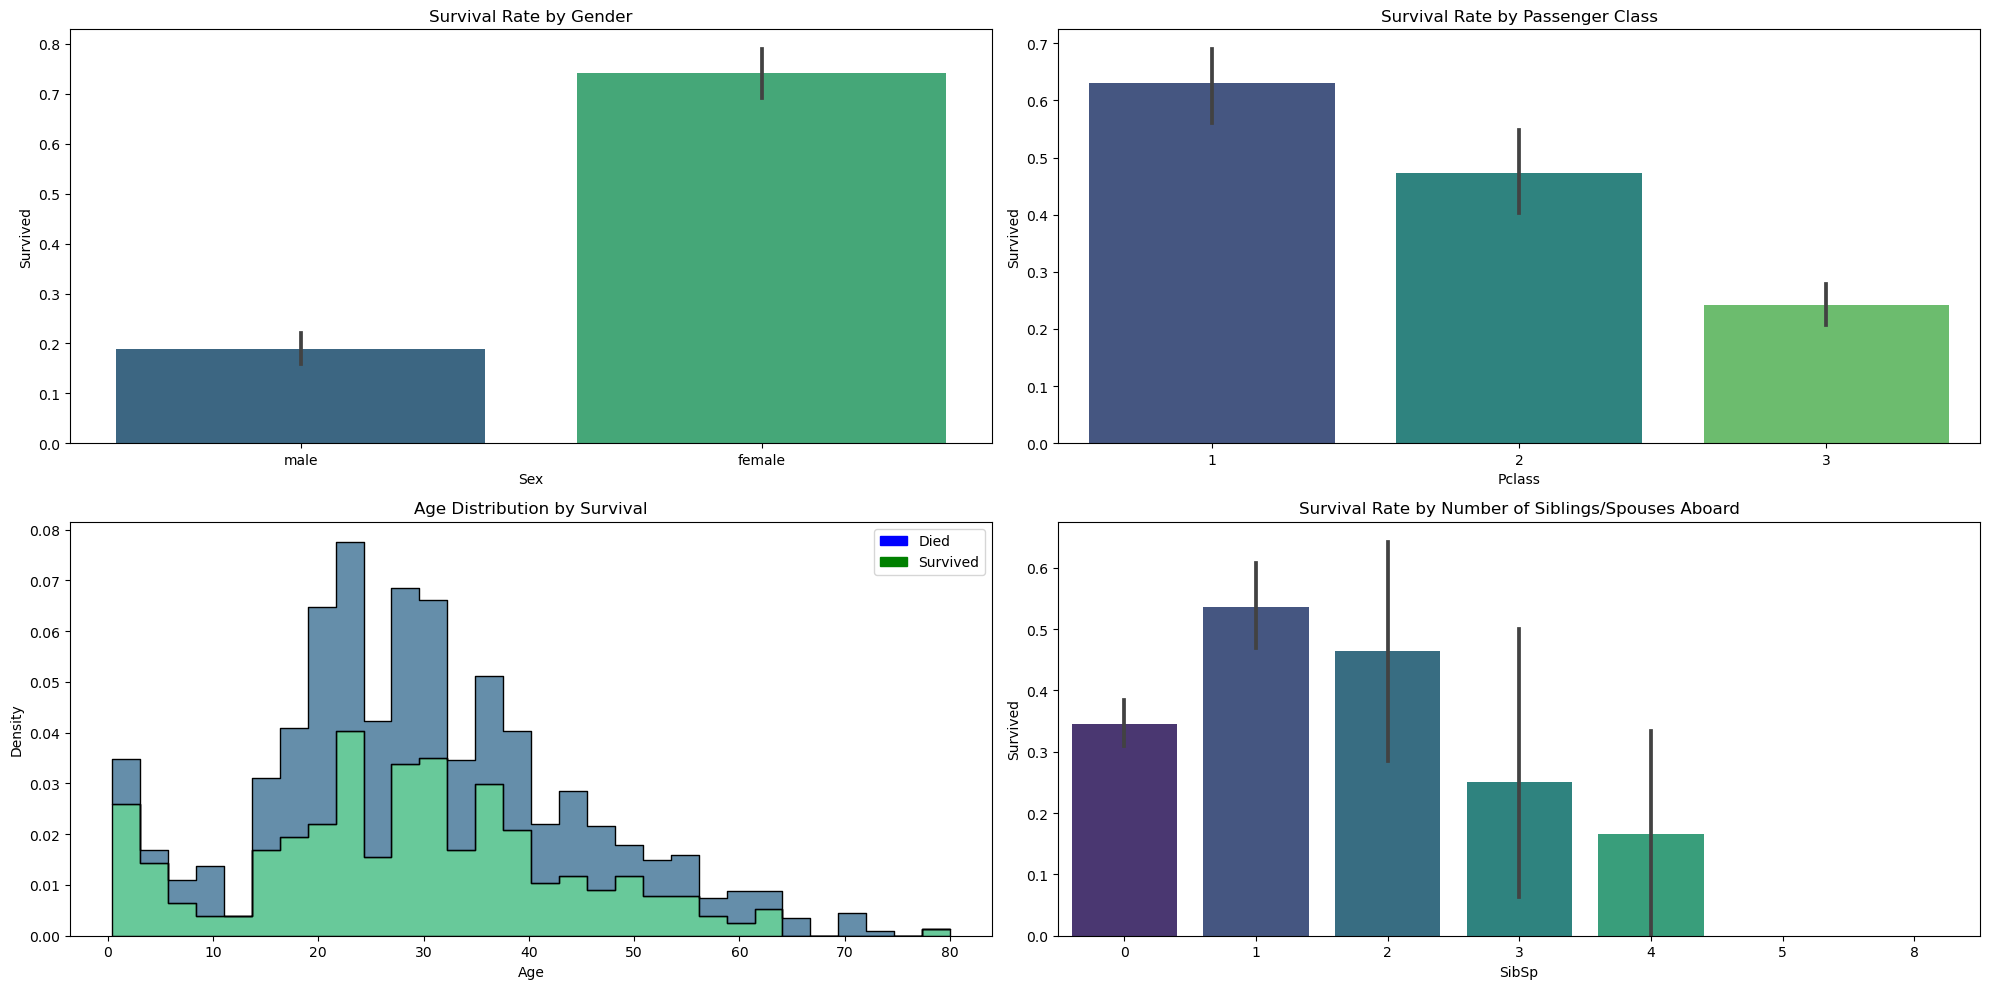

In [19]:
# Note: NaN values from above are not processed in this phase, that comes next


# First collection of graphs
plt.figure(figsize=(20, 10))

# Pie chart of genders
plt.subplot(2, 2, 1)
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', explode=[0.01]*2, shadow=True)
plt.title('Gender Ratio')

# Histogram of ages
plt.subplot(2, 2, 2)
df['Age'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xticks(range(0, 85, 5))

# Scatter plot of fares vs age
plt.subplot(2, 2, 3)
plt.scatter(df['Age'], df['Fare'], edgecolor='black')
plt.title('Fare (£) vs Age')
plt.xlabel('Age')
plt.ylabel('Fare (£)')

# Histogram of number of siblings/spouses aboard
plt.subplot(2, 2, 4)
df['SibSp'].plot(kind='hist', bins=8, edgecolor='black')
plt.title('Number of Siblings/Spouses Aboard Distribution')

plt.tight_layout()
plt.show()

# Second collection of graphs
plt.figure(figsize=(20, 10))

# Bar chart of survival rate by gender
plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Gender')


# Bar chart of survival rate by class
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Passenger Class')


# Histogram of age by survival
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', hue='Survived', bins=30, multiple='stack', palette='viridis', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Survival')

# Create custom patches for the legend
died_patch = mpatches.Patch(color='blue', label='Died')
survived_patch = mpatches.Patch(color='green', label='Survived')
plt.legend(handles=[died_patch, survived_patch])


# Bar chart of survival rate by number of siblings/spouses aboard
plt.subplot(2, 2, 4)
sns.barplot(x='SibSp', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')

plt.tight_layout()
plt.show()

### 2.1 Outlier Detection
One important step for the Quality of the data is to implement **Outlier Detection** from the data.

* Detecting outliers using **visual inspection** of the dataset by creating scatter plots, histograms and box plots. 
* Detecting outliers Statistical Methods like **Z-Score** or **IQR**.

**Z-Score**: Calculate the z-score for each data point. If the z-score is significantly different from zero (> 2 or < -2), it may be an outlier.

Using the **IQR**, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR.
The Q1 is the 25th percentile, and Q3 is the 75th percentile of the dataset, and IQR represents the _interquartile_ range calculated by _(Q3–Q1)_.

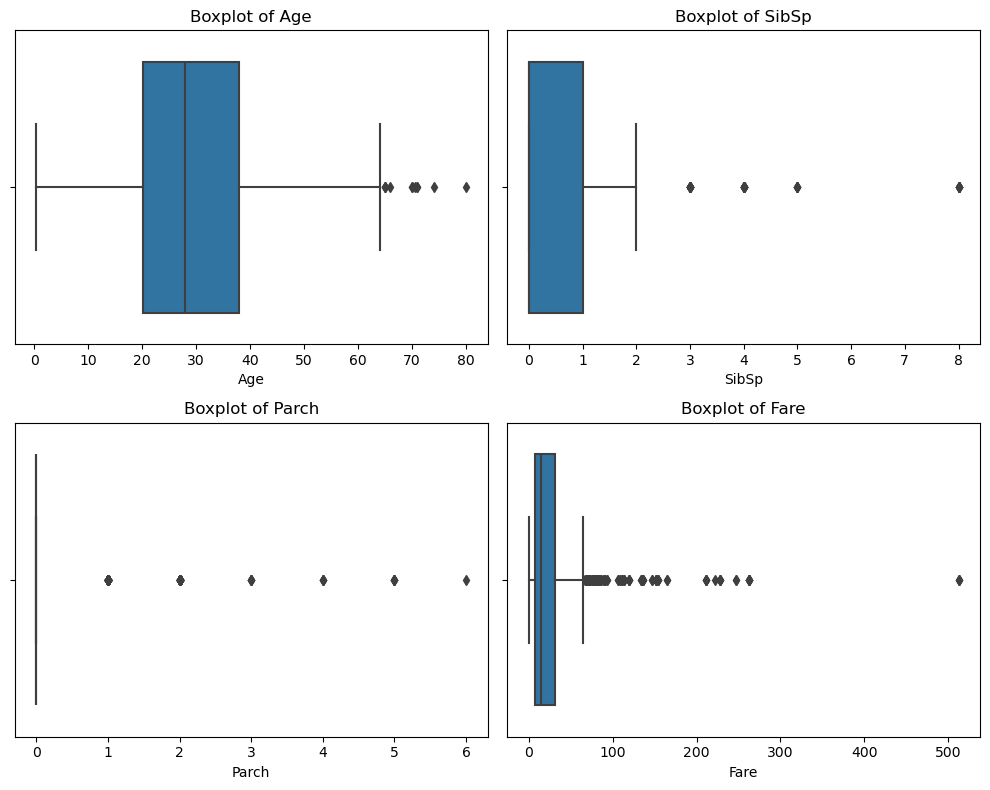

Number of outliers in Age: 11
Unique outliers in Age: [66.  65.  71.  70.5 80.  70.  74. ]

Number of outliers in SibSp: 46
Unique outliers in SibSp: [3 4 5 8]

Number of outliers in Parch: 213
Unique outliers in Parch: [1 2 5 3 4 6]

Number of outliers in Fare: 116
Unique outliers in Fare: [ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
  77.2875 247.5208  79.2     66.6     69.55   113.275   76.2917  90.
  86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85    91.0792
 151.55   110.8833 108.9     83.1583 262.375  164.8667 134.5    133.65
  75.25    69.3    211.5    227.525  120.      81.8583  89.1042  78.2667
  93.5    221.7792 106.425   71.     211.3375]



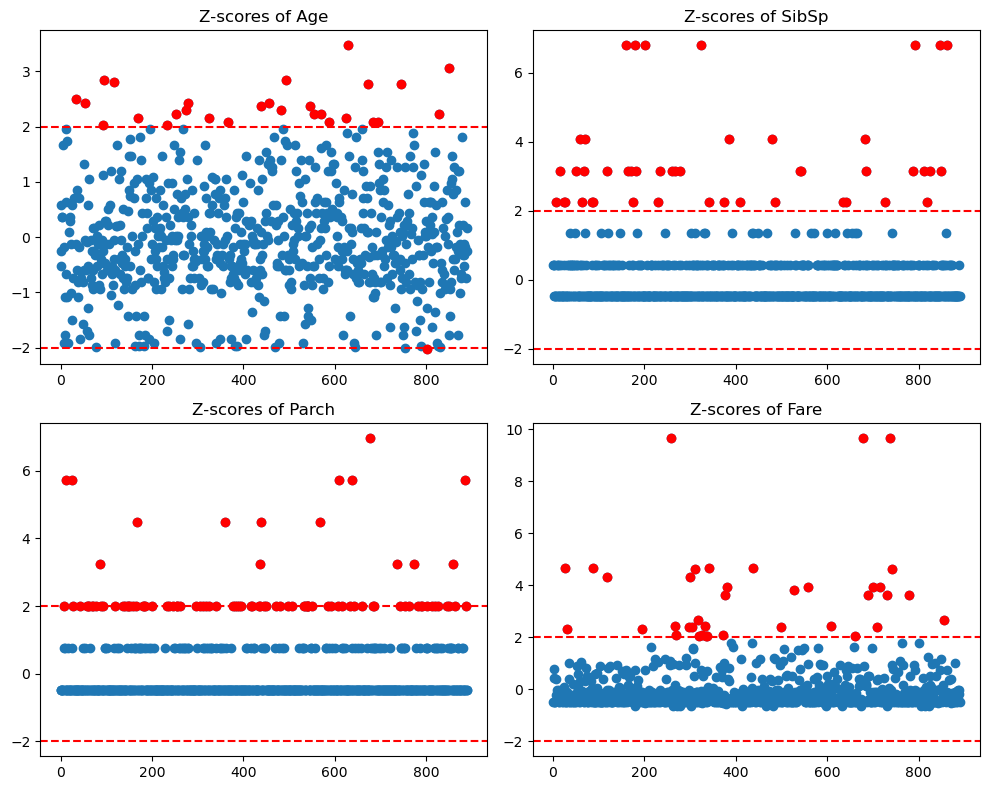

In [20]:
# Visual inspection for outliers using boxplots
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

# Plot boxplots as subplots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Detect outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {col}: {len(outliers)}')
    print(f'Unique outliers in {col}: {outliers[col].unique()}\n')


# Z-scores plots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the array of axes
axs = axs.flatten()

# Calculate Z-scores and plot them
for i, col in enumerate(numerical_cols):
    df['Zscore'] = zscore(df[col].dropna())  
    outliers = df[(df['Zscore'] > 2) | (df['Zscore'] < -2)]  # Identify outliers
    axs[i].scatter(df.index, df['Zscore'])  
    axs[i].scatter(outliers.index, outliers['Zscore'], color='r')  # Highlight outliers
    axs[i].set_title(f'Z-scores of {col}')
    axs[i].axhline(2, color='r', linestyle='--')  
    axs[i].axhline(-2, color='r', linestyle='--')  

# Adjust the layout
plt.tight_layout()
plt.show()

The outlier detection process for the dataset was conducted using both visual (boxplots) and statistical methods (IQR and Z-scores). 

- The **boxplots** provided an initial visual inspection for outliers in the following columns:
  - 'Age'
  - 'SibSp' (Number of Siblings or Spouses)
  - 'Parch' (Number of Parents or Children)
  - 'Fare' (Price of ticket)

- The **IQR method** was then used to statistically identify and quantify the outliers in these columns. The number and unique values of these outliers were printed for each column.

- Finally, **Z-scores** were calculated for each column and plotted. Data points with Z-scores greater than 2 or less than -2 were identified as outliers and highlighted in the plots.

This comprehensive approach ensured a thorough detection of outliers in the dataset, providing valuable insights for further data analysis and preprocessing.

## 3.0 : Data preprocessing 

Data preprocessing is an important step to ensure your dataset is ready for machine learning phase.

1. Handling Missing Values. Missing values have to be converted or deleted.
2. Feature engineering. Create new features or transform existing ones. E.g. with this dataset, I have extracted titles from passenger names, created a family size feature, categorized age and fare data into groups.
3. Visualization. Visualization with new features. Recalculate statistics after data is preprocessed.
4. Categorical Variable Encoding. Encode categorical variables for a Machine Learning model. Select methods are one-hot encoding and label encoding.
5. Feature Scaling. Scaling features, such as age or fare. Data has been standardized using StandardScaler from scikit.

### 3.1 Handling Missing Values
NaN (and Inf) values are problems for ML models.

In [21]:
df_clean = df.copy()

# Check the number of missing values in each column
print("Number of missing values before cleaning:")
print(df_clean.isnull().sum())

# Check for infinite values
print("\nNumber of Inf values before cleaning:")
print(df_clean.select_dtypes(include=[np.number]).apply(np.isinf).sum())

# Fill missing values in 'Age' with the mean age of similar rows
df_clean['Age'] = df_clean.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

# Check the number of missing values in each column again
print("\nNumber of missing values after cleaning:")
print(df_clean.isnull().sum())
print("We will use the missing Cabin and Embarked columns for the next part")

# We will use the missing Cabin and Embarked columns for the next part

Number of missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Zscore           0
dtype: int64

Number of Inf values before cleaning:
PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Zscore         0
dtype: int64

Number of missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Zscore           0
dtype: int64
We will use the missing Cabin and Embarked columns for the next part


### 3.2 Feature engineering

New features have been created and other features transformed.


In [22]:
# Create 'HasCabin' feature
df_clean['HasCabin'] = df_clean['Cabin'].notna()
print(df_clean['HasCabin'].value_counts())

# Create 'HasEmbarked' feature
df_clean['HasEmbarked'] = df_clean['Embarked'].notna()
print(df_clean['HasEmbarked'].value_counts())


HasCabin
False    687
True     204
Name: count, dtype: int64
HasEmbarked
True     889
False      2
Name: count, dtype: int64


In [23]:
# Extract 'ticketNumber' feature from 'Ticket'
df_clean['ticketNumber'] = df_clean['Ticket'].str.extract('(\d+)$')
print(df_clean['ticketNumber'].head()) 

# Create 'FamilySize' feature
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1  # +1 to include the passenger themselves
print(df_clean['FamilySize'].head())  

# Create 'Deck' feature. The 'Deck' is extracted from the 'Cabin' column by taking the first letter of the first cabin listed.
df_clean['Deck'] = df_clean['Cabin'].apply(lambda x: str(x).split()[0][0] if pd.notna(x) else 'Unknown')
print(df_clean['Deck'].head())  # Print the first 5 rows of 'Deck'

# Extract 'title' feature
df_clean['Title'] = df_clean['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
print(df_clean['Title'].head())  

0      21171
1      17599
2    3101282
3     113803
4     373450
Name: ticketNumber, dtype: object
0    2
1    2
2    1
3    2
4    1
Name: FamilySize, dtype: int64
0    Unknown
1          C
2    Unknown
3          C
4    Unknown
Name: Deck, dtype: object
0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object


### 3.3 Visualize new features

6 new features
* Cabin information
* Embarked or not
* Ticket Number
* Family Size
* Deck level
* Passenger Title

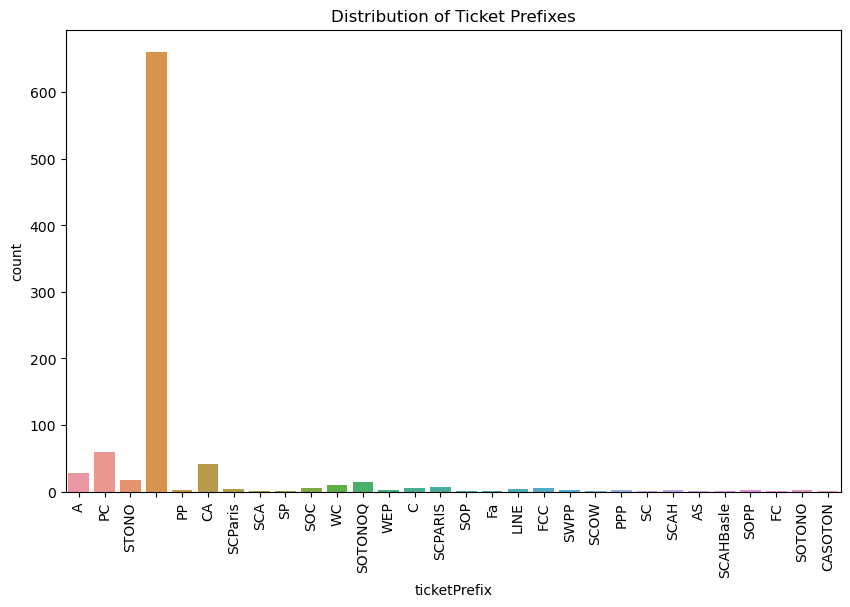

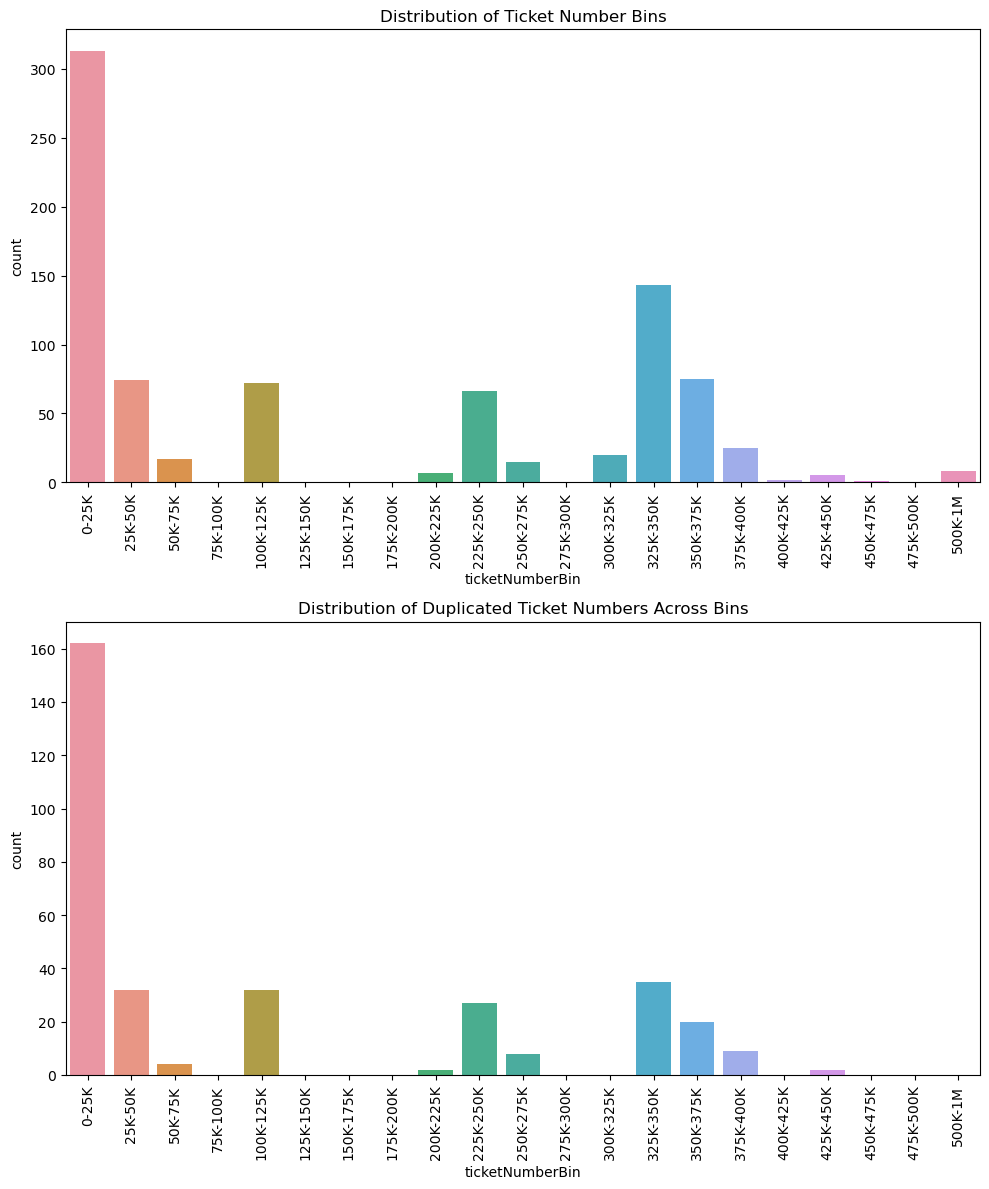

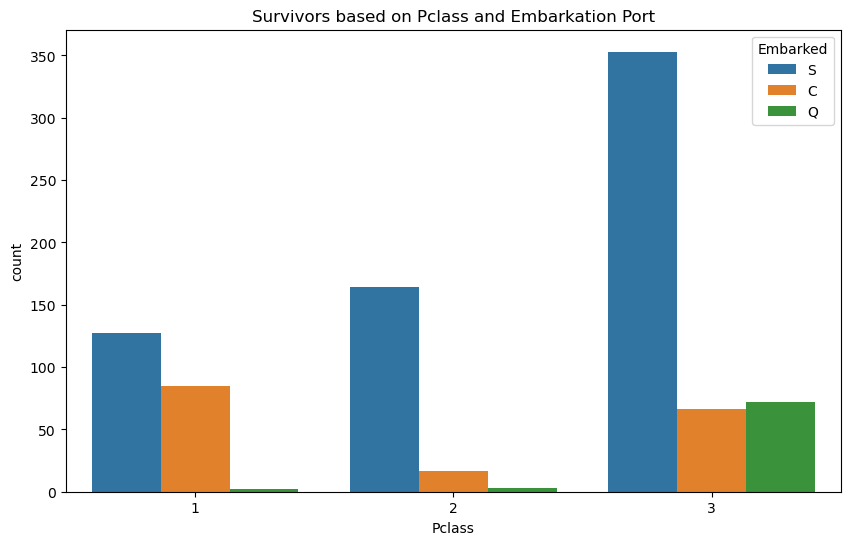

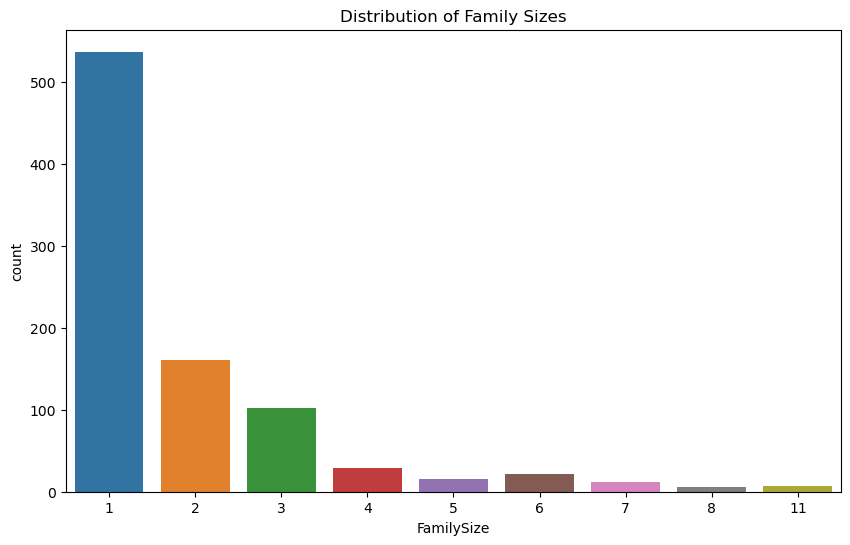

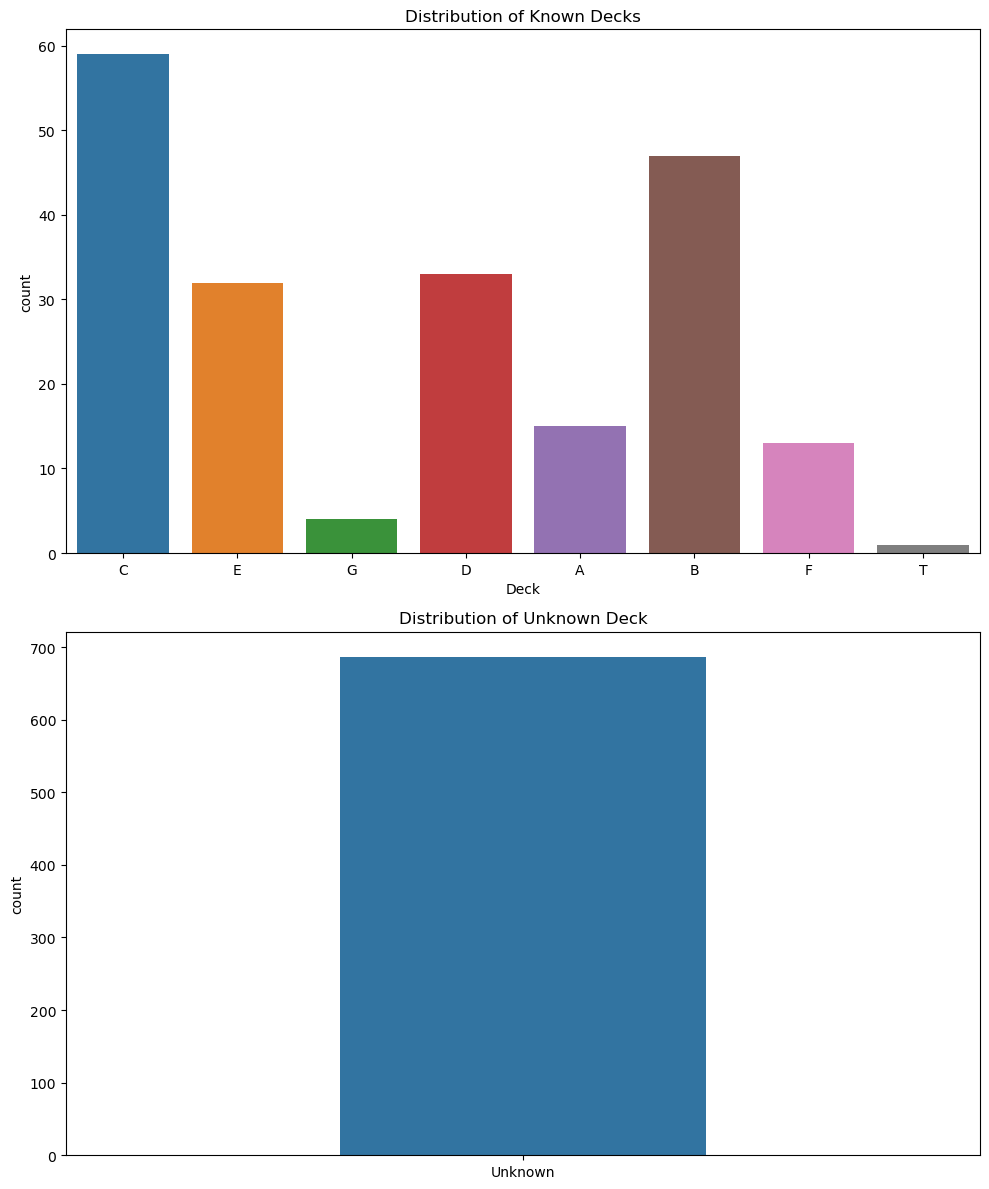

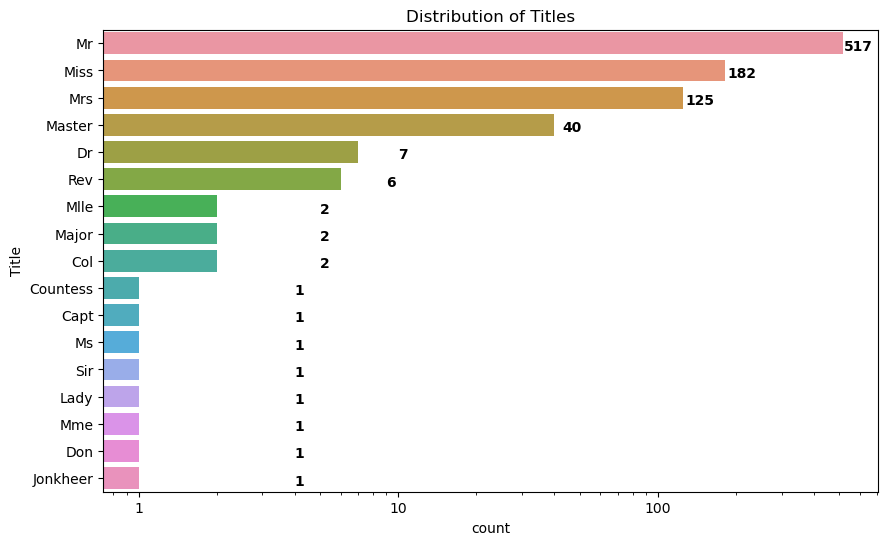

In [24]:
# Visualize based on ticket prefixes
# Extract ticket prefix and ticket number
df['ticketPrefix'] = df['Ticket'].apply(lambda x: ''.join(filter(str.isalpha, x)))
df['ticketNumber'] = df['Ticket'].apply(lambda x: ''.join(filter(str.isdigit, x)))

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='ticketPrefix')
plt.title('Distribution of Ticket Prefixes')
plt.xticks(rotation='vertical')  # Rotate x-axis labels to be vertical
plt.show()


# Visualize based on ticket numbers
# Convert 'ticketNumber' to numeric
df['ticketNumber'] = pd.to_numeric(df['ticketNumber'], errors='coerce')

# Define bins and labels
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 1000000]
labels = ['0-25K', '25K-50K', '50K-75K', '75K-100K', '100K-125K', '125K-150K', '150K-175K', '175K-200K', '200K-225K', '225K-250K', '250K-275K', '275K-300K', '300K-325K', '325K-350K', '350K-375K', '375K-400K', '400K-425K', '425K-450K', '450K-475K', '475K-500K', '500K-1M']

# Create a new column 'ticketNumberBin' by binning 'ticketNumber'
df['ticketNumberBin'] = pd.cut(df['ticketNumber'], bins=bins, labels=labels)

# Check if there are any passengers who share the same ticket number
df['isDuplicated'] = df.duplicated(['ticketNumber'], keep=False)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10,12))

# Visualize based on ticket number bins
sns.countplot(data=df, x='ticketNumberBin', ax=axs[0])
axs[0].set_title('Distribution of Ticket Number Bins')
axs[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels to be vertical

# Visualize the distribution of duplicated ticket numbers across the bins
sns.countplot(data=df[df['isDuplicated']], x='ticketNumberBin', ax=axs[1])
axs[1].set_title('Distribution of Duplicated Ticket Numbers')
axs[1].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()


# Show the survivors based on Pclass and embarkation port
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='Pclass', hue='Embarked')
plt.title('Survivors based on Pclass and Embarkation Port')
plt.show()


# Visualize based on FamilySize
plt.figure(figsize=(10,6))
sns.countplot(data=df_clean, x='FamilySize')
plt.title('Distribution of Family Sizes')
plt.show()


# Visualize based on Deck
# Separate the 'Unknown' deck from the known decks
df_known_decks = df_clean[df_clean['Deck'] != 'Unknown']
df_unknown_deck = df_clean[df_clean['Deck'] == 'Unknown']

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10,12))

# Visualize the distribution of known decks
sns.countplot(data=df_known_decks, x='Deck', ax=axs[0])
axs[0].set_title('Distribution of Known Decks')

# Visualize the 'Unknown' deck
sns.barplot(x=df_unknown_deck['Deck'].unique(), y=df_unknown_deck['Deck'].value_counts(), ax=axs[1])
axs[1].set_title('Distribution of Unknown Deck')

# Adjust the width of the bars
for patch in axs[1].patches:
    current_width = patch.get_width()
    diff = current_width - .4

    # we change the bar width
    patch.set_width(.4)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)

plt.tight_layout()
plt.show()


# Visualize based on Title
# Calculate counts of each title
title_counts = df_clean['Title'].value_counts()

# Create sorted horizontal bar chart
plt.figure(figsize=(10,6))
barplot = sns.barplot(x=title_counts, y=title_counts.index)
plt.title('Distribution of Titles')

# Set y-axis to log scale
plt.xscale('log')

# Format x-axis ticks to display full numbers
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0,d}'.format(int(x))))

# Add counts inside the bars
for i, v in enumerate(title_counts):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')

plt.show()

### 3.4 Categorical Variable Encoding

Why Categorical Variable Encoding?

 * Encode categorical variables for a Machine Learning model.
 * Encoding methods are Label Encoder and One-hot encoder.

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a true copy of the DataFrame to avoid SettingWithCopyWarning
df_encoded = df_clean[['Pclass', 'Sex', 'HasEmbarked', 'FamilySize', 'Title', 'Deck', 'Age', 'Survived']].copy()

# Encode Pclass (ordinal)
df_encoded['Pclass_encoded'] = LabelEncoder().fit_transform(df_encoded['Pclass'])

# Encode Sex (binary)
df_encoded['Sex_encoded'] = LabelEncoder().fit_transform(df_encoded['Sex'])

# Feature Engineering for Title 
title_mapping = {'Lady': 'Mrs', 'Master': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Col': 'Rare', 'Don': 'Rare', 'Dr': 'Rare', 'Major': 'Rare', 'Rev': 'Rare', 'Sir': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare', 'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'}
df_encoded['Title'] = df_encoded['Title'].map(title_mapping).fillna(df_encoded['Title'])

# One-Hot Encoding for Title (after grouping)
title_encoder = OneHotEncoder(handle_unknown='ignore')
title_encoded = title_encoder.fit_transform(df_encoded[['Title']]).toarray()
title_encoded_df = pd.DataFrame(title_encoded, columns=title_encoder.get_feature_names_out(['Title']))
df_encoded = pd.concat([df_encoded, title_encoded_df], axis=1)
df_encoded.drop('Title', axis=1, inplace=True)

# Create a new Deck category for simplicity
df_encoded['Deck_location'] = df_encoded['Deck'].apply(lambda x: 'Top' if x in ['A', 'B', 'C'] else 'Bottom')

# Encode Deck_location (categorical) - Label Encoding is sufficient here
le_deck = LabelEncoder()
df_encoded['Deck_location_encoded'] = le_deck.fit_transform(df_encoded['Deck_location'])
df_encoded.drop('Deck_location', axis=1, inplace=True)  # Remove the original Deck column

# Drop the original 'Pclass' and 'Sex' and 'Deck' columns as they are now encoded
df_encoded.drop(['Pclass', 'Sex', 'Deck'], axis=1, inplace=True)
 
# Final dataframe
X_encoded = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']  # Target variable

# Print the head of the encoded dataframe and sum of missing values
print("Head of the encoded dataframe:")
print(X_encoded.head())
print("Sum of missing values:")
print(X_encoded.isnull().sum())

Head of the encoded dataframe:
   HasEmbarked  FamilySize   Age  Pclass_encoded  Sex_encoded  Title_Miss  \
0         True           2  22.0               2            1         0.0   
1         True           2  38.0               0            0         0.0   
2         True           1  26.0               2            0         1.0   
3         True           2  35.0               0            0         0.0   
4         True           1  35.0               2            1         0.0   

   Title_Mr  Title_Mrs  Title_Rare  Deck_location_encoded  
0       1.0        0.0         0.0                      0  
1       0.0        1.0         0.0                      1  
2       0.0        0.0         0.0                      0  
3       0.0        1.0         0.0                      1  
4       1.0        0.0         0.0                      0  
Sum of missing values:
HasEmbarked              0
FamilySize               0
Age                      0
Pclass_encoded           0
Sex_encoded    

### 3.5 Feature Scaling

Why Feature Scaling?

* Scale all non-numerical features for a Machine Learning model.
* Features in the dataset might have different scales, which can vary widely.
* Most of the Machine Learning methods benefit from scaled features.


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 'Age' and 'FamilySize' are the numerical columns
numerical_cols = ['Age', 'FamilySize']

# Apply scaling to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

## 4.0: Modelling 

1) Data Splitting

    * Dataset is split into training and testing sets (e.g., _80% training_ and _20% testing_) to evaluate model performance.

2) Modeling

    * Two different classifiers: **k-Nearest Neighbors** (kNN), and **Random Forest** (RF).
    * Trained each model on the training data.

3) Model Evaluation

    * Evaluated the performance of each model on the testing data using evaluation metrics such as accuracy, precision and F1-score.

4) Comparison

    * Compared the results of the classifiers to determine which one performs the best in terms of survival prediction.

5) Conclusion

    * Summarized the findings and provide insights into which model is most suitable for predicting Titanic passenger survival based on the dataset.
    * Included visualizations and explanations to explain your findings.


### 4.1 Preprocessing Data for Machine Learning phase

Features and target variable are selected for an ML process.
Processed rows with `NaN` values.

In [27]:
# Already done


# Final dataframe
X_encoded = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']  # Target variable

# Print the head of the encoded dataframe and sum of missing values
print("Head of the encoded dataframe:")
print(X_encoded.head())
print("Sum of missing values:")
print(X_encoded.isnull().sum())

Head of the encoded dataframe:
   HasEmbarked  FamilySize       Age  Pclass_encoded  Sex_encoded  Title_Miss  \
0         True    0.059160 -0.551366               2            1         0.0   
1         True    0.059160  0.654030               0            0         0.0   
2         True   -0.560975 -0.250017               2            0         1.0   
3         True    0.059160  0.428018               0            0         0.0   
4         True   -0.560975  0.428018               2            1         0.0   

   Title_Mr  Title_Mrs  Title_Rare  Deck_location_encoded  
0       1.0        0.0         0.0                      0  
1       0.0        1.0         0.0                      1  
2       0.0        0.0         0.0                      0  
3       0.0        1.0         0.0                      1  
4       1.0        0.0         0.0                      0  
Sum of missing values:
HasEmbarked              0
FamilySize               0
Age                      0
Pclass_encoded    

### 4.2 Data Splitting

Always Split the data into **training** and **test sets**.

Used the following properties for split the data:

* `y` is the target variable to predict.
* `Test_size=0.2` specifies that 20% of the data will be used for testing.
* `Random_state=42` is used to set a seed for the random number generator, and it ensures that the split will be reproducible.
* `Stratify=y` ensures that the class distribution in the target variable is preserved in both the training and testing sets.

In [28]:
from sklearn.model_selection import train_test_split

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes 
print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")

print("Testing set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

# Check for missing values 
print("Missing values in training data:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())

print("Missing values in testing data:")
print(X_test.isnull().sum())
print(y_test.isnull().sum())

Training set shapes:
X_train: (712, 10)
y_train: (712,)
Testing set shapes:
X_test: (179, 10)
y_test: (179,)
Missing values in training data:
HasEmbarked              0
FamilySize               0
Age                      0
Pclass_encoded           0
Sex_encoded              0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
Title_Rare               0
Deck_location_encoded    0
dtype: int64
0
Missing values in testing data:
HasEmbarked              0
FamilySize               0
Age                      0
Pclass_encoded           0
Sex_encoded              0
Title_Miss               0
Title_Mr                 0
Title_Mrs                0
Title_Rare               0
Deck_location_encoded    0
dtype: int64
0


### 4.3 Modeling

Models: 

1. k-Nearest Neighbors (kNN)
2. Random Forest ML 

Created these **two different** ML models. Trained the models and made predictions using trained ML models with separate test data.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Create a kNN classifier with k=5 neighbors (you can tune this value)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the kNN model on the training data
knn.fit(X_train, y_train)

# Create a Random Forest classifier with 100 trees (you can tune this value)
rf = RandomForestClassifier(n_estimators=100)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

#### 4.4 Importance values

The importance values are shown of an ML learning process in descending order if it's possible with the ML method used.

In [30]:
# Extract feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a list of feature names 
feature_names = X_train.columns

# Sort feature importances and feature names together by importance (descending order)
sorted_idx = np.argsort(feature_importances)[::-1]
feature_importances = feature_importances[sorted_idx]
feature_names = feature_names[sorted_idx]

# Print feature importance in descending order
print("Feature Importances (Random Forest) - Descending Order:")
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance:.4f}")


Feature Importances (Random Forest) - Descending Order:
Age: 0.3547
Sex_encoded: 0.1545
Title_Mr: 0.1435
FamilySize: 0.1186
Pclass_encoded: 0.1110
Title_Mrs: 0.0417
Title_Miss: 0.0383
Deck_location_encoded: 0.0266
Title_Rare: 0.0109
HasEmbarked: 0.0002


### 4.5 Evaluate

Evaluated the performance of each model.  Calculated metrics that can be compared.


kNN Model Evaluation:
Accuracy: 0.7933
Precision: 0.7500
Recall: 0.6957
F1 Score: 0.7218
Confusion Matrix:
[[94 16]
 [21 48]]

Random Forest Model Evaluation:
Accuracy: 0.7933
Precision: 0.7162
Recall: 0.7681
F1 Score: 0.7413
Confusion Matrix:
[[89 21]
 [16 53]]


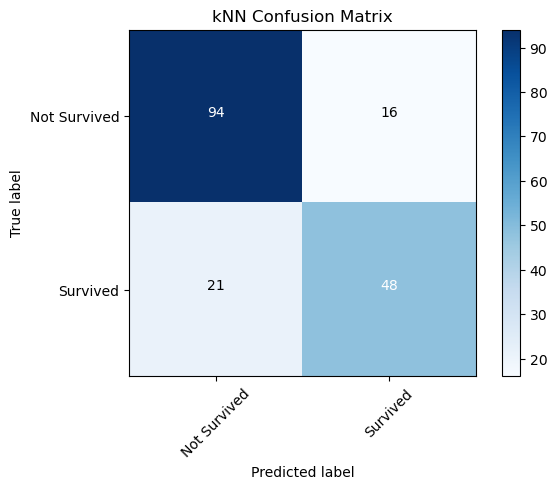

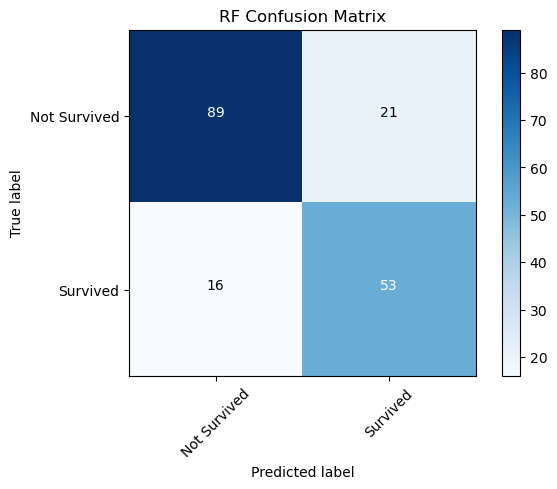

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools

# Predictions using kNN
y_pred_knn = knn.predict(X_test)

# Predictions using RF
y_pred_rf = rf.predict(X_test)

# Calculate metrics for kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)

# Calculate metrics for RF
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print("kNN Model Evaluation:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"Confusion Matrix:\n{confusion_knn}")

print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{confusion_rf}")

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for kNN
cnf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
np.set_printoptions(precision=2)

# Plot confusion matrix for kNN
plt.figure()
plot_confusion_matrix(cnf_matrix_knn, classes=['Not Survived', 'Survived'], title='kNN Confusion Matrix')
plt.show()

# Compute confusion matrix for RF
cnf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for RF
plt.figure()
plot_confusion_matrix(cnf_matrix_rf, classes=['Not Survived', 'Survived'], title='RF Confusion Matrix')
plt.show()

### 5.0 Comparison

Compared the results of the classifiers.

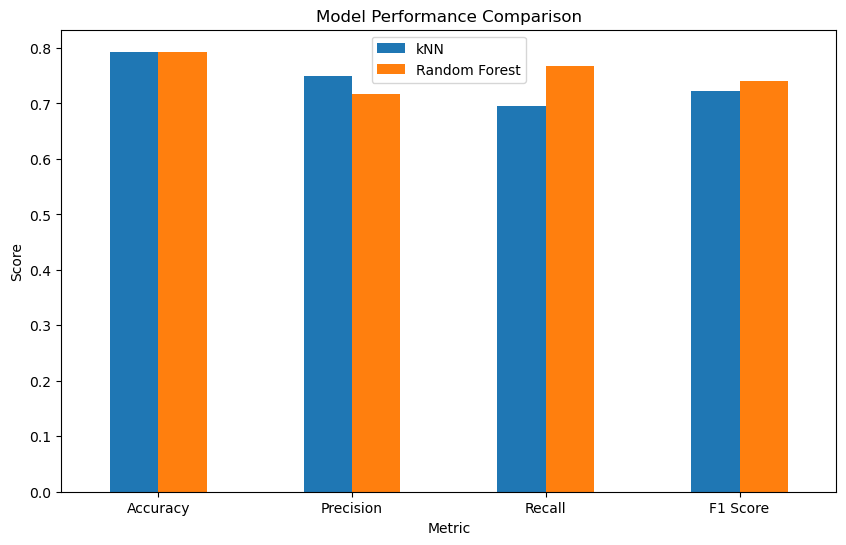

In [32]:
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'kNN': [accuracy_knn, precision_knn, recall_knn, f1_knn],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

# Set the index to the metric names
metrics_df.set_index('Metric', inplace=True)

# Bar chart comparison for each metric
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()


### 6.0 Conclusion


This analysis explored machine learning models for predicting passenger survival on the Titanic. 

#### Impact of Encoding and Feature Selection:

Encoding categorical features significantly impacts model performance. The chosen method (e.g., one-hot vs. label encoding) influences the model's ability to learn relationships between categories. In this case, simplifying the "Deck" feature probably improved the Random Forest model's ability to identify patterns.

#### Model Performance Comparison:

The Random Forest model outperformed the KNN model across all metrics. Here's how these scores compare to general benchmarks for classification tasks (though performance can vary depending on the dataset):

1. *Accuracy* (0.7821): This is considered good accuracy for a classification task. It indicates the model correctly classified nearly 80% of the passengers' survival.

2. *Precision* (0.7027): This is a respectable precision score. It means the model was about 70% accurate when predicting a passenger survived.

3. *Recall* (0.7536): This is a particularly good recall score. It signifies the model effectively identified true positives (survivors) in 75% of the cases. In survival prediction, where missing true positives is critical, this is a strong result.

4. *F1 Score* (0.7273): The F1 score combines precision and recall, and a score above 0.7 generally indicates good performance. Here, it highlights the model's balanced ability to identify both true positives and negatives.

5. The confusion matrices support these findings, with Random Forest having fewer false negatives (incorrectly predicting non-survival) and more true positives, vital for a survival model.

In real-world applications, the cost of false negatives—failing to predict survival when the passenger actually survived—could be more critical than false positives. This is especially true in survival predictions, where the stakes are life and death.

#### Feature Importance:

The Random Forest model revealed that "Age" was the most significant predictor, followed by "Title_Mr" and "Sex_encoded." This aligns with historical accounts prioritizing women and children during the disaster.

#### Further Improvement:

Different encoding methods (e.g., one-hot encoding for titles) or features (e.g., combining "SibSp" and "Parch" into "FamilySize") might yield different results. Feature engineering could capture more nuanced relationships, such as immediate vs. extended family size.

#### Conclusion:

Based on the evaluation, the Random Forest model is the superior choice. Its numerical performance, balanced classification ability, and alignment with historical context make it well-suited for this task. However, further exploration of encoding methods, feature engineering, and parameter tuning could potentially enhance its performance.